# AIM 5001 - Data Acquisition and Management - Project 1 (Week 5)
Pujita Ravichandar

## Introduction

**Dataset Information:** This project utalizes a 20,000 row subset of the **hflights** package sourced from the US Beareau of Transportation Statistics. This data set contains information about the metrics of commercial domestic flights that departed from two airports in Houston, TX, IAH and HOU in 2011.

**Research Questions:** 
1. What is the relationship between flight cancellations and airlines?

To answer this question, the relevant flight attributes used are: `UniqueCarrier`, `Cancelled`, and `CancellationCode`. These values are used to calculate the airlines with the most delays and the average delays per airlines. Both of these values can be grouped by the cancellation code to gain further insight on the performance of certain airline companies.

2. On average, which airlines are most dependable to not have delays?

This inquiry is answered using the `UniqueCarrier`, `ArrDelay`, and `DepDelay` attributes representing the airlines, arrival delay (in minutes), and departure delay (in minutes) respectively. These values are used to calculate the overall average delay time, which can then be ordered by airline to provide an overview of performance. This can also be split into arrival and departure delays to find a more indepth correlation between the type of delays within each airline. This can be used to optimize performance.

3. In total, which airlines experience the most delays?

Similarly to the previous question, this looks at the same attributes (`UniqueCarrier`, `ArrDelay`, and `DepDelay`) in a different manner. This question looks at the overall performance of airlines getting their customers to their destination punctually. These attributes are used to caluclate the total delay times (arrival plus depature) based on airline. These values are also presented while split into arrival and departure delays times to provide further insight on each airlines performance realitive to its competitiors.

**People Interested in This Analysis:** People optimizing airlines punctuality and employees concerned with customer satifcation rates will be interested in learning about the cancellation and delay times of flights. This could also be useful for analysis of how to avoid common mistakes and where to better staff workers to deal with complications relating to delays and cancellations. This analysis could also be indicative of bigger problems in the airlines' larger organizational layout.

## Importing Data

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import dataset from project description
filename = 'https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv'
hflights = pd.read_csv(filename)

## Data Preparation Work:

For each question, the data preparation begins with creating a subset of the necessary attributes. This organizes the necessary information and allows for an organized set of dataframes related to each question. The numerical bullets below will explain the data preparation in detail for each question.

**1. Cancellations vs. Airlines:**
The first step is to make a subset of data from the `hflgihts` dataset with the attributes of `UniqueCarrier`, `Cancelled`, and `CancellationCode` called `cancelled`. I then created a two new subsets of values, both grouped by the airline. One shows the total cancelled flghts for each airlines titled `sum_cancelled`, the other one, titled `sum_cancelled_ordered` shows the cancelled flights ordered by airline and the cancellation code. Additionally, the `sum_cancelled` values were ordered in decedning order by the total cancellation values, identified by the `sum_cancelled_sorted` function. Overall, this organizes all of the cancelled flights by airline. The code for this is below.

In [16]:
#create data subset called cancelled with attributes necessary to ansqer question 1 from hflights
cancelled = hflights[["UniqueCarrier","Cancelled", "CancellationCode"]]

In [17]:
#create data subset to sum the cancellations by airline
sum_cancelled = cancelled.groupby(['UniqueCarrier']).sum()

#sort total cancellations is descending order
sum_cancelled_sorted = sum_cancelled.sort_values(['Cancelled'], ascending = False)

#print the cancellation sums per airline
sum_cancelled

,Cancelled
UniqueCarrier,
AA,14
AS,0
B6,6
CO,53
DL,20
EV,9
F9,0
FL,11
MQ,6


In [18]:
#order the total cancellations by airline and cancellation code
sum_cancelled_ordered = cancelled.groupby(['UniqueCarrier', 'CancellationCode']).sum()

#print data subset with the airline, cancellation code, and sum of cancellations
sum_cancelled_ordered

Cancelled
UniqueCarrier CancellationCode           
AA            A                         2
              B                        11
              C                         1
B6            A                         1
              B                         5
CO            A                         5
              B                        48
DL            A                         2
              B                        18
EV            A                         6
              B                         3
FL            A                         1
              B                         9
              C                         1
MQ            A                         1
              B                         4
              C                         1
OO            B                         5
              C                         2
UA            A                         1
              B                         2
US            A                         2
              B                         8
WN            A                        23
              B                        14
XE            A                        13
              B                        35

**2. Airlines vs. Average Delays**

I made a subset of information under the title `delay` that included the attributes of `UniqueCarrier`, `ArrDelay`, and `DepDelay`. To calculate the overall delay of each airline, I created a new column in this subset titled `TotalDelay` that added the floating point values from the Arrival Dealy and the Departure Delay columns. This gives us an over all time of delays for each airline. This is useful for answering reserach questions 2 and question 3. From here, I grouped these values by the airlines using the `UniqueCarrier` attribute to sort these values by airline, and then found the mean delay times for each airline. Following this, I sorted the delay values by mean total delays in ascending order to make visualizing this material more intuitative. This sorted data is under the title `delay_sorted` This makes it easy to compare the performance of multiple airlines. The code for this is below.

In [19]:
#create data subset with attributes from hflight dataset to answee question 2
delay = hflights[['UniqueCarrier', 'ArrDelay', 'DepDelay']]

#create new column in delay called 'TotalDelay' that sums the arriva and delay times in minutes
delay['TotalDelay'] = delay.ArrDelay + delay.DepDelay


<ipython-input-19-762a7ff40c92>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay['TotalDelay'] = delay.ArrDelay + delay.DepDelay


In [20]:
#create subset grouping the dealays by airline and finding the average delay times in minutes
delay_carrier = delay.groupby(['UniqueCarrier']).mean()

#print airlines, arrival, departure, and total delays
print(delay_carrier)

#sort delay_carrier dataset by total delay times in decreasing order
delay_sorted = delay_carrier.sort_values(['TotalDelay'], ascending = False)

                ArrDelay   DepDelay  TotalDelay
UniqueCarrier                                  
AA              0.950397   5.610672    6.581349
AS              9.396552   4.559322   14.120690
B6             11.086022  18.234043   29.430108
CO              5.366780   9.881251   15.226393
DL              4.310924   8.033613   12.344538
EV             13.927083  21.742268   34.989583
F9             13.725806   6.306452   20.032258
FL              1.624060   3.939850    5.563910
MQ              7.144615   9.901538   17.046154
OO              5.743106   6.692197   12.481858
UA             -2.234694   3.909091    1.755102
US             -3.595960   1.494983   -2.545455
WN              8.644941  14.394336   22.993182
XE              3.613172   3.846657    7.441514


**3. Airlines vs. Total Delays**

Using the `delay` subset created in the part above, I created a new subset titled `delay_sum` containing the sum of all arrival, departure, and the total delays (arrival + departure). This subset is ordered by airline identified by the `UniqueCarrier` attribute, as we are interested in comparing the performance of airlines. I created a new subset titled `delay_sum_sorted` that arranged the airlines in decending order with respect to the `TotalDelay` attribute. This new subset is mainly for visualization purposes that we will see in the coming section. The relevant code for this is below. 

In [21]:
#create data subset based on delay variable that groups by airlines and calculated the sub of delays
delay_sum = delay.groupby(['UniqueCarrier']).sum()

#sort the delay sums by total delay times in minutes in descending order
delay_sum_sorted = delay_sum.sort_values(['TotalDelay'], ascending = False)

#print the the dataset with sums of delays
print(delay_sum)


               ArrDelay  DepDelay  TotalDelay
UniqueCarrier                                
AA                479.0    2839.0      3317.0
AS                545.0     269.0       819.0
B6               1031.0    1714.0      2737.0
CO              36317.0   66985.0    103037.0
DL               1026.0    1912.0      2938.0
EV               1337.0    2109.0      3359.0
F9                851.0     391.0      1242.0
FL                216.0     524.0       740.0
MQ               2322.0    3218.0      5540.0
OO               3957.0    4631.0      8600.0
UA               -219.0     387.0       172.0
US              -1068.0     447.0      -756.0
WN              31701.0   52856.0     84316.0
XE              24248.0   25888.0     49940.0


## Exploratory Data Analysis

**1. Cancellation vs. Airlines**
Summary statistics for the total cancelled flights by airline are represented by the first bar graph below. This visual representation of the data clearly indicates that CO, XE, and WN are the airlines with the most cancelled flights.

The second bar graph below shows the cancelled flights by airlines ordered by reason of cancellation. This shows that reason B is the most popular reason for cancellation and is correlated to weather, especially in the cases of the CO and XE airlines. The second most popular reason for cancellation is reason A referring to carrier. The least popular reason is reason C coressponding to the national air system. 

The code for both of these graphs is below.

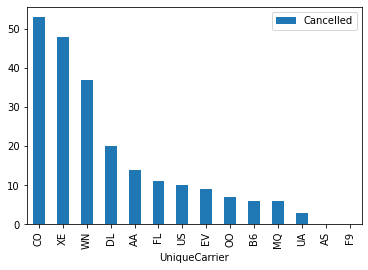

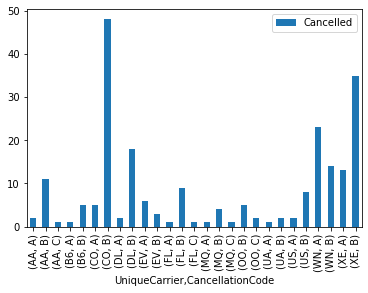

In [22]:
#bar plot of sorted cancellation data by airline in descending order
sum_cancelled_sorted.plot.bar()

#bar plot of cancellation data by airline and cancellation code
#ideally this can be made into a more visually concise table with another visualization tool
sum_cancelled_ordered.plot.bar(stacked = True);

**2. Airlines vs. Average Delays**

The summary statistics for the average delays are represented by the first set of bar graphs below. There we can see that EV and F9 had the most arrival delays, EV and B6 had the most departure and total delays.

The stacked bar graph below show the representaiton of the arrival, depature, and total delays stacked in order. It is clear to see that the airlines with the top considerations for average delays are EV, B6. and WN.

The necessary code to generate these plots is below.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12117c670>,
      dtype=object)

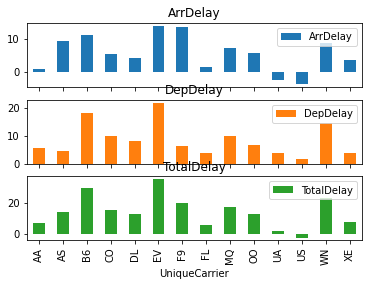

In [23]:
#bar plor of the types of delays sorted by airline
delay_carrier.plot.bar(subplots = True)

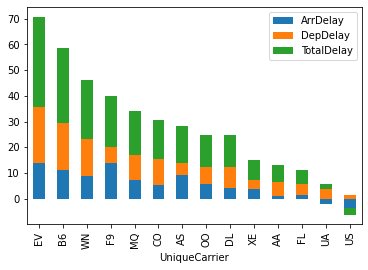

In [24]:
#bar plor of the arrival, departure, and total delays as averages stacked in descending order by total delay
delay_sorted.plot.bar(stacked = True)

**3. Airlines vs. Total Delays**

The first set of bar graphs depict the total arrival, departure, and total delay times for the different airlines. This will give us the overall performance of the airlines respective to each other. The airline with the most arrival, departure, and total delays is CO, followed by WN. This same data is depicted by the stacked bar graph below. These three airlines show a very clear trend; with respect to the other airlines, they are the most significantly delayed for the time frame of this dataset.

The necessary code to generate these graphs is below.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x120e655b0>,
      dtype=object)

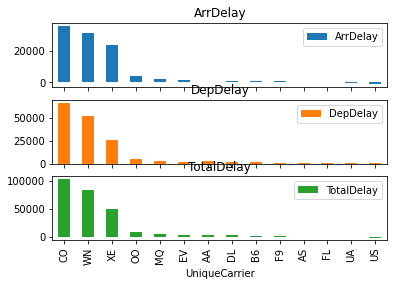

In [25]:
#bar plot of the arrival, departure, and total delays as sumns in descending order by airline
delay_sum_sorted.plot.bar(subplots = True)

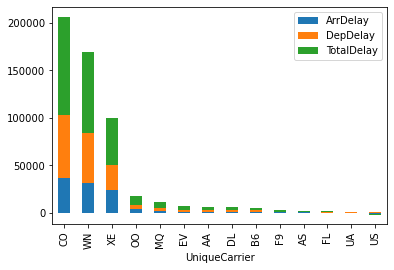

In [26]:
#bar plot of the sums of arrival, departure, and total delays stacked in descending by total delays
#and sorted by airline
delay_sum_sorted.plot.bar(stacked = True)

## Research Results


**1. What is the relationship between flight cancellations and airlines?**

Answering this question is easiest done by looking at the bar graphs under the 'Exploratory Data Analysis' section. The airlines with the most cancellations are CO, XE, and WN in descending order. CO with 53, XE with 48, and WN with 37 cancellations.  These airlines have signifcantly more cancellations than the other airlines. The following airline to WN was DE with 20 cancellations. WN had 1.85 times the cancellations compared to DE. Contrastingly, the airlines with the least cancellations are AS anf F9, both with 0 cancellations, and UA with 3 cancellations for the time period of this dataset. 

**2. On average, which airlines are most dependable to not have delays?**

The graphs pertaining to these questions are under the second subsection of the 'Exploratory Data Analysis' section. The three airlines with the least average delays are US, UA, and FL in that order. Referring to the data frames in the 'Data Preparation' section, US has an average delay time of -2.55 minutes, UA with 1.76 minutes, and FL with 5.56. Interestingly, US has an average performance of arriving early. The airlines with the most delays are EV, B6, and WN in that order. EV has an average delay time of 39.99 minutes, B6 with 29.34 minues, and WN with 22.99 minutes. For most airlines, there seem to be more departure delays than arrival delays.

**3. In total, which airlines experience the most delays?**

The graphs used to visualize this question are under the third subsection of the larger 'Exploratory Data Analysis' section. The US, UA, and FL airlines had the least total delays during this timeframe; US with -756 minuts, UA with 152 minutes, and FL with 740 minutes. CO, WN and XE has the highest total delay times; CO with 103,037 minutes, WN with 85,316 minutes, and XE with 49,940 minutes. Interestingly, looking at the stacked bar plot, for most of the airlines, the departure delay contributes more to the total delay than the arrivals. Also, it is important to notice that these results are not exactly the same as the previous section. This shows value in doing both an analysis looking at the averages and the sums.


This information will be very useful to employees optimizing airlines punctuality, comparing airline performance, and where to best staff workers to ensure speedy solutions to potential problems. The analysis on these variables is also useful for predicting customer satisfaction within the realm of commercial flying from Houston.


## Conclusions

Overall, this exploratory data analysis (EDA) of this flight database was able to provide insight on the cancellation and delays of airlines. This analysis will be useful in comparing airline preformance and can identify areas of improvement. Looking at the research questions posed and considering the variables of cancellation and delays, conclusions can be made about the most and least realiable airlines. CO can be determined as the least realiable airlines, as it has the highest cancellations and total delay time. UA can be determined as the most realiable, as it had the least cancellations, second least average delay time, and second least total delay time. However, if placing  focus on punctuality, US is superior as it had an average and total trend of arriving early.

From this analysis, the posed research questions were able to be answered using this dataset and provide valueble insight on the relative performance and punctuality of the airlines in the hflights dataset.

This research can be extended in the future to account for more variables that affect the punctuality, performance, and customer satisfaction of the airlines. This can also be extended to different airports arround the world. Looking into this can imporve the effiency and reliability of commerical flying as a whole.